# A Rain Predictor

A Rain Predictor model has been trained below by applying Logistic Regression from scratch using weather dataset of various cities of Australia.

Let's dig into the model!

Begin with importing required python libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [32]:
weather=pd.read_csv('weatherAUS.csv')  #loading dataset using read_csv() function of pandas

In [33]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [34]:
weather.isnull().sum() #shows number of null entries in each column

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

We can see that there are some null entries in many of the columns.

In many cases these can be ignored but not for some important keys like ['Rainfall','RainToday','RainTomorrow']

In [35]:
weather=weather.dropna(subset=['Rainfall','RainToday','RainTomorrow']) #drop rows with null entries

In [36]:
weather['Date']=pd.to_datetime(weather['Date']) #Convert Date into format interpretable by dataframe

We can now easily extract day,month and year.

But for predicting rain month is the most important feature and there isn't any significant contribution from day and year.

In [37]:
# weather['Year'] = weather['Date'].dt.year
weather['Month'] = weather['Date'].dt.month   #extracting month
# weather['Day'] = weather['Date'].dt.day

In [38]:
# Convert Yes,No to binary labels
weather['RainTomorrow']=weather['RainTomorrow'].map({'Yes':1 ,'No':0})
weather['RainToday']=weather['RainToday'].map({'Yes':1 ,'No':0})

In [39]:
df=weather.drop(['WindGustDir','Date','WindDir9am','WindDir3pm'],axis=1)

In [40]:
from sklearn.preprocessing import LabelEncoder
df['Location']=LabelEncoder().fit_transform(weather['Location'])

# Label encoder provides categorical values to locations

In [41]:
df=df.fillna(0) #fill null values with zeros

Rain tommorow is our actual target variable(Y)

In [42]:
Y=(df['RainTomorrow'].to_numpy()).reshape(-1,1) #extracting target variable
print(Y.shape)

(140787, 1)


In [43]:
df=df.drop('RainTomorrow',axis=1)

In [44]:
final=df.to_numpy() #convert dataframe to numpy array

# Data Preprocessing

In [58]:
x_train,x_test,y_train,y_test=train_test_split(final,Y,train_size=0.85)
print('No of training examples:',x_train.shape[0])
print('No of test examples:',x_test.shape[0])
print('No of features:',x_train.shape[1])

No of training examples: 119668
No of test examples: 21119
No of features: 19


Due to varying range of values different features take, feature scaling is a very important step

In [59]:
# perform feature scaling for better results
# I have used standard min-max scalar which scales down all values to the range -1 to 1
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# u=(np.sum(x_train,axis=1)/x_train.shape[1]).reshape(19,1)
# x_train=x_train-u
# YOU CAN ALSO PERFORM NORMALISATION BUT IT WILL NOT AFFECT THE MODEL'S PERFORMANCE MUCH
# with normalization, test accuracy around 81.97
# without normalization,test accuracy around 82.2 

But, without feature scaling model won't even work!

In [60]:
# Reshape input x so that rows represent features and columns represent training examples
x_train=x_train.T
x_test=x_test.T
# Reshape output y to align with input's shape
y_train=y_train.reshape(1,-1)
y_test=y_test.reshape(1,-1)

In [61]:
print(x_train.shape)
print(y_train.shape)

(19, 119668)
(1, 119668)


# Model building


Great!

We have our data ready to be fitted in the model.

Now, let's build the model

In [62]:
# sigmoid activation function for logistic regression
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [63]:
# initializing parameters
def initialize_parameters(dim):
  w=np.zeros((dim,1))
  b=0
  return w,b

In [64]:
def propagate(w,b,x,y):
  m=x.shape[1]  #no of training examples
  z=np.dot(w.T,x)+b
  a=sigmoid(z)
  dw=(np.dot(x,(a-y).T))/m  #gradient of parameter w
  db=(np.sum(a-y))/m  #gradient of parameter b
  cost=np.sum((-np.log(a))*y+(-np.log(1-a))*(1-y))/m #cost function for logistic regression
  cost=np.squeeze(cost)
  assert(dw.shape==w.shape)
  assert(cost.shape==())
  return dw,db,cost


In [65]:
# apply gradient descent to minimize the above defined cost function
def optimize(w,b,x,y,e,alpha):
  costs=[]
  for i in range(e):
    dw,db,cost=propagate(w,b,x,y)
    tw=w-(alpha*dw)
    tb=b-(alpha*db)
    w=tw
    b=tb
    if i%20==0:
      costs.append(cost)
      print(cost)
  return w,b,costs,dw,db


In [66]:
# make predictions
def predict(w,b,x):
  m=x.shape[1]
  a=sigmoid(np.dot(w.T,x)+b)
  y=np.zeros((1,m))
  y=(a>=0.5)
  assert(y.shape==(1,m))
  return y

In [67]:
# combine the above functions to train the model
def model(x_train,y_train,x_test,y_test,e,alpha):
  dim=x_train.shape[0]
  w,b=initialize_parameters(dim)
  w,b,costs,dw,db=optimize(w,b,x_train,y_train,e,alpha)
  y_predict_train=predict(w,b,x_train)
  y_predict_test=predict(w,b,x_test)
  print("Train accuracy:",100-np.mean(np.abs(y_predict_train-y_train))*100)
  print("Test accuracy:",100-np.mean(np.abs(y_predict_test-y_test))*100)
  return y_predict_train,y_predict_test,costs,w,b



In [70]:
y_predict_train,y_predict_test,costs,w,b=model(x_train,y_train,x_test,y_test,400,0.01)

0.6931471805599452
0.6596580359598601
0.6321925918854083
0.6093016034357451
0.5899319458465743
0.5733189394230738
0.5589018401834288
0.5462632848236028
0.5350873808310196
0.5251309497687171
0.516203713163226
0.5081544957003403
0.5008614875718966
0.4942252698560666
0.4881637438368876
0.48260839033448677
0.47750147130243487
0.4727939083591707
0.4684436542390009
0.46441442782446984
0.4606747206576438
0.4571970085158988
0.4539571195857856
0.4509337234634828
0.4481079142957437
0.445462867950363
0.4429835579141925
0.44065651816937285
0.43846964394788696
0.4364120232582247
Train accuracy: 82.41635190694254
Test accuracy: 82.58913774326436


In [57]:
# plt.plot(costs)
# plt.show()

epoch=400 : 
            Train accuracy: 81.86064779222515
            Test accuracy: 81.99251858516028

epoch=600:  
            Train accuracy: 82.41635190694254
            Test accuracy: 82.58913774326436
            
Note that there's not any significant difference in the accuracies so 400 is better

Also observe that the steepness of both the learning curves is also almost similar

600:

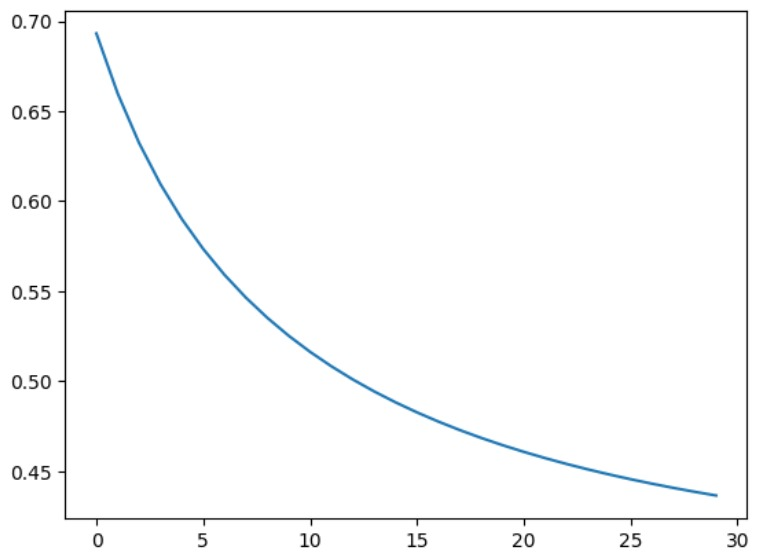

400:

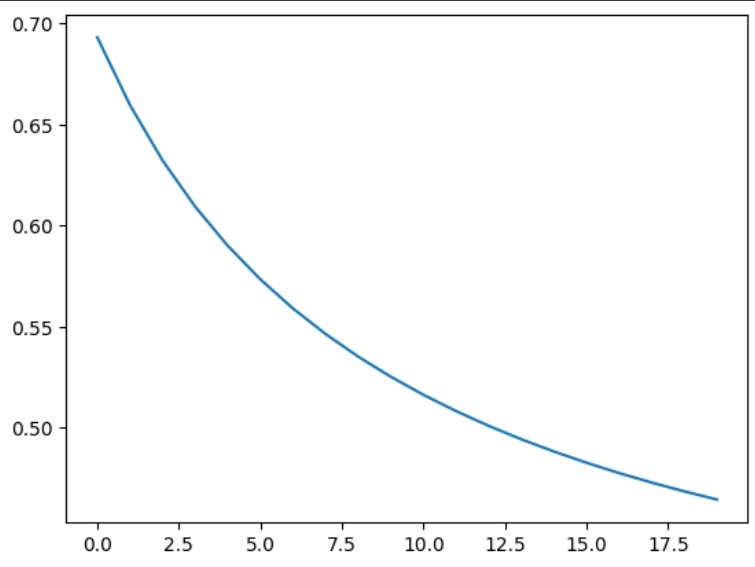

***Great!***
We have our rain predictor ready which will predict whether tomorrow it will rain or not given weather condtions of today in a particular city